# Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
## 2nd Edition Reading Note Chapter 1
#### Lifan Zhang Jun 3, 2019
#### Book source: Safari O'Reilly 


## Use Cases of ML
- When traditional solution is too complex
- When no known solution exists for the problem

## Benefits of ML
- Learning is automated when the pattern of incoming data has changed
- ML can help human learning. Eg. Once a spam model is well learnt, it can provide predictors/features of spam emails and enveil unsuspected correlation or new trends. 
- ML helps discovering patterns that were not immediately apparent (data mining)

## Machine Learning Systems 
Examples that the system uses to learn are called the training set. <br>
Each training sample is called a training instance (or sample).
<br>
- **Supervised v.s. Unsupervised**
    - supervised: training data has labels or target numeric values
    - unsupervised: training data is unlabeled
    - semisupervised learning: a lot of training data is unlabeled and a little bit is labeled
    - reinforcement learning the agent observe the environment and get reward in return to learn the best strategy given a specific environment
- **Online v.s. Batch**
    - batch/offline: incapable of learning incrementally; usually offline. If you want a new version of the system about new data, you need to train a new version of the system from scratch on the full dataset (new + old)
    - online: feed new data instances sequentially, either individually or by small groups called mini-batches so that each learning step is fast and cheap and the system can learn about new data on the fly, as it arrives. The rate where the system adapts to new data is the learning rate (adjustable) Faster learning will be more affected by noise and outliers in the new data. 
   
- **Instance-based v.s. Model-based** **<font color = red> DO NOT UNDERSTAND </font>**
    - instance-based: system learns the labeled samples and generalizes the pattern to new cases by comparing new cases to the learnt examples using a similarity measure. <font color = red> compare ONE test sample with ONE of the training samples for similarity ??? </font>
    - model-based: system generalizes the pattern of the labeled examples to a model and apply the model to test samples for prediction. 


## Performance Measure
- Utility function: how good the model is
- Cost function: how bad the model is

## Challenges of Machine Learning
- Insufficient quantity of training data
- Nonrepresentative training data
    - sampling noise if the sample is too small
    - sampling bias can occur if the sampling method is flawed even though the sample size is large
    - overfitting 
        - occurs when apply complex model to noise or small training data
        - solution: 
            - simplify model by selecting fewer parameters (or regularization)
            - gather more training data
            - reduce noise in training data (by fixing data errors and removing outliers)
    - underfitting 
        - occurs when model is too simple to learn the underlying structure of the data 
        - solution:
            - choose a more powerful model with more parameters
            - feed better feature / feature engineering 
            - reduce constraints on the model / reduce the regularization hyperparameters
<br>
*Hyperparameter: a parameter of a learning algorithm (not of the model.) It is not affected by the learning algorithm itself and it must be set prior to training and remains constant during training.*
    
## Dealing with Outliers
- clearly outlier instances: discard 
- instances with few missing features:
    - ignore the features
    - ignore the instances
    - fill in the missing values (with feature median)
    - train 1 model with the missing features and 1 without the missing features

## ML - Step 1 Build Models
- study the data & business problem
- select a model to build
- train model on training data (or the algorithm is searching for the model parameter values that minimize a cost function)
- apply trained model to make predictions onnew cases (or inference)

## ML - Step 2 Test & Validation
- generalization error / out-of-sample error: the error rate of the model trained with training dataset on new cases. This error rate is estimated by evaluating the model on test dataset. 
- model selection: 
    - train models of different algorithms and compare generalization errors
    - training different models of the same algorithm and compare generalization errors
    - healthy conduct to get accurate generalization errors: 
        - partition a *validation set* from the training dataset for:
            - tuning hyperparameter
            - model selection
            - tackle data mismatch between data on stage in training and in production
        - cross validation

## Question
1. The book talks about that the linear model we defined for GDP and life satisfaction has 2 parameters and thus has 2 degrees of freedom. Wouldn't it be 1?

## Life Satisfaction Example


In [105]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

oecd_df = pd.read_csv('./oecd_bli_2015.csv', thousands = ',') #textbook has thousands = ','
oecd_df.head()
list(oecd_df)
oecd_df[oecd_df.Value == 4.9] #Checked, Value is the column of Lifa Satisfaction

oecd_df = oecd_df[oecd_df.Indicator == 'Life satisfaction']
oecd_df = oecd_df[oecd_df.Inequality == 'Total']
oecd_df[oecd_df.Country == 'Hungary']

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2679,HUN,Hungary,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,4.9,NaN,NaN


In [106]:
gdp_df = pd.read_csv('./gdp_per_capita.csv', sep='\t', header=[0], \
                     thousands = ',', encoding='latin1', na_values='n/a')
gdp_df.head()#textbook has thousands = ','
list(gdp_df)
gdp_df[gdp_df.Country == 'Hungary'] #Confirmed: 2015 column is the column for GDP

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
72,Hungary,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [130]:
life_df = pd.merge(oecd_df, gdp_df, on = 'Country', how = 'left')
life_df_vis = life_df[['Country', 'Value','2015']]
life_df_vis.columns = ['Country', 'Life_Satisfaction','GDP']
life_df_vis.dropna()
life_df_vis_plot = life_df_vis[life_df_vis.Country.isin(['Hungary','Korea','France','Australia','United States'])]
life_df_vis_plot

,Country,Life_Satisfaction,GDP
0,Australia,7.3,50961.865
7,France,6.5,37675.006
10,Hungary,4.9,12239.894
15,Korea,5.8,27195.197
29,United States,7.2,55805.204


In [131]:
vocabulary = list(life_df_vis_plot['GDP'])
color = ['red'] * len(vocabulary)
color_dict = dict(zip(vocabulary, color))
color_dict
GDP = list(life_df_vis['GDP'])
lifeSatisfaction = list(life_df_vis['Life_Satisfaction'])

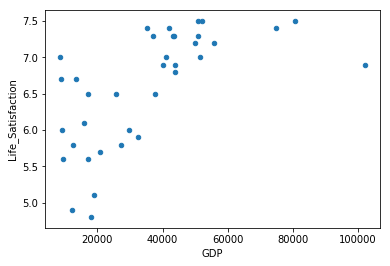

In [132]:
life_df_vis.plot(kind='scatter',x='GDP', y='Life_Satisfaction')
plt.show()

In [133]:
import sklearn.linear_model
X = np.c_[life_df_vis['GDP']]
Y = np.c_[life_df_vis['Life_Satisfaction']]
linear = sklearn.linear_model.LinearRegression()
linear.fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

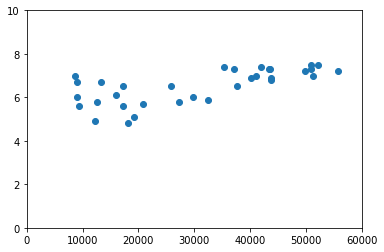

In [126]:
axes = plt.gca()
axes.set_xlim([0,60000])
axes.set_ylim([0,10])
plt.scatter(GDP, lifeSatisfaction) #how to highlight a point in matplotlib scatter plot